In [1]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [2]:
# Importing datasets

train_df = pd.read_csv('/kaggle/input/titanic-dataset/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic-dataset/test.csv')

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
# Impact of class on survival
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
# Impact of sex on survival
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
# Impact of SibSp (siblings/spouses) on survival
train_df.groupby(['SibSp'],as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
# Impact of parch (children/parents) on survival
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [11]:
# Checking tha family size
train_df['family_size']=train_df['SibSp'] + train_df['Parch'] + 1 
test_df['family_size']=test_df['SibSp'] + test_df['Parch']+1

In [12]:
# Impact of family size on survival
train_df.groupby(['family_size'], as_index=False)['Survived'].mean()

,family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [13]:
family_map = {1:'Alone', 2:'Small', 3:'Small', 4:'Small', 5:'Medium', 
             6:'Medium', 7:'Large', 8:'Large', 11:'Large'}
train_df['family_size_grouped']=train_df['family_size'].map(family_map)
test_df['family_size_grouped']=test_df['family_size'].map(family_map)

In [14]:
train_df.groupby(['family_size_grouped'], as_index=False)['Survived'].mean()

,family_size_grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [15]:
# Impact of port of embarkation on survival
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

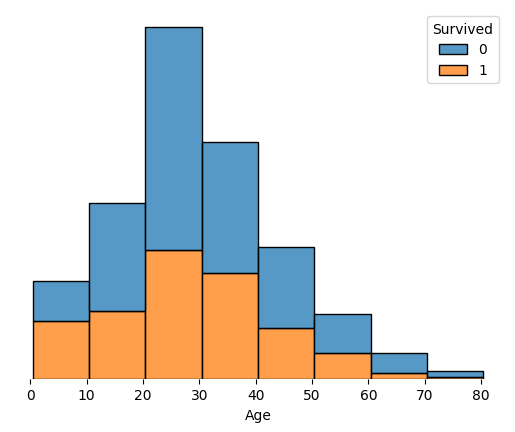

In [16]:
# Age x Survived

g = sns.histplot(data=train_df, x='Age', hue='Survived', binwidth=10, multiple='stack')
g.set_ylabel('')
g.set_yticks([])
sns.despine(bottom = True, left=True)

In [17]:
# Create discrete bins of Age
train_df['age_cut']= pd.qcut(train_df['Age'], 8)
test_df['age_cut']=pd.qcut(test_df['Age'], 8)

In [18]:
train_df.groupby(['age_cut'], as_index=False, observed=True)['Survived'].mean()

,age_cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [19]:
#Reshaping the Age variable as the min is 0.4 and the max is 80 (there 
# is a lot of data, so restructuring the variable based on the bins
# might ease the modelling)

train_df.loc[train_df['Age']<=16, 'Age']=0
train_df.loc[(train_df['Age']>16) & (train_df['Age']<= 20.125), 'Age']=1
train_df.loc[(train_df['Age']>20.125) & (train_df['Age']<= 24.0), 'Age']=2
train_df.loc[(train_df['Age']>24.0) & (train_df['Age']<= 28.0), 'Age']=3
train_df.loc[(train_df['Age']>28.0) & (train_df['Age']<= 32.312), 'Age']=4
train_df.loc[(train_df['Age']>32.312) & (train_df['Age']<= 38.0), 'Age']=5
train_df.loc[(train_df['Age']>38.0) & (train_df['Age']<= 47.0), 'Age']=6
train_df.loc[(train_df['Age']>47.0) & (train_df['Age']<= 80.0), 'Age']=7
train_df.loc[train_df['Age']>80.0, 'Age']

Series([], Name: Age, dtype: float64)

In [20]:
test_df.loc[test_df['Age']<=16, 'Age']=0
test_df.loc[(test_df['Age']>16) & (test_df['Age']<= 20.125), 'Age']=1
test_df.loc[(test_df['Age']>20.125) & (test_df['Age']<= 24.0), 'Age']=2
test_df.loc[(test_df['Age']>24.0) & (test_df['Age']<= 28.0), 'Age']=3
test_df.loc[(test_df['Age']>28.0) & (test_df['Age']<= 32.312), 'Age']=4
test_df.loc[(test_df['Age']>32.312) & (test_df['Age']<= 38.0), 'Age']=5
test_df.loc[(test_df['Age']>38.0) & (test_df['Age']<= 47.0), 'Age']=6
test_df.loc[(test_df['Age']>47.0) & (test_df['Age']<= 80.0), 'Age']=7
test_df.loc[test_df['Age']>80.0, 'Age']

Series([], Name: Age, dtype: float64)

In [21]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_size_grouped,age_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

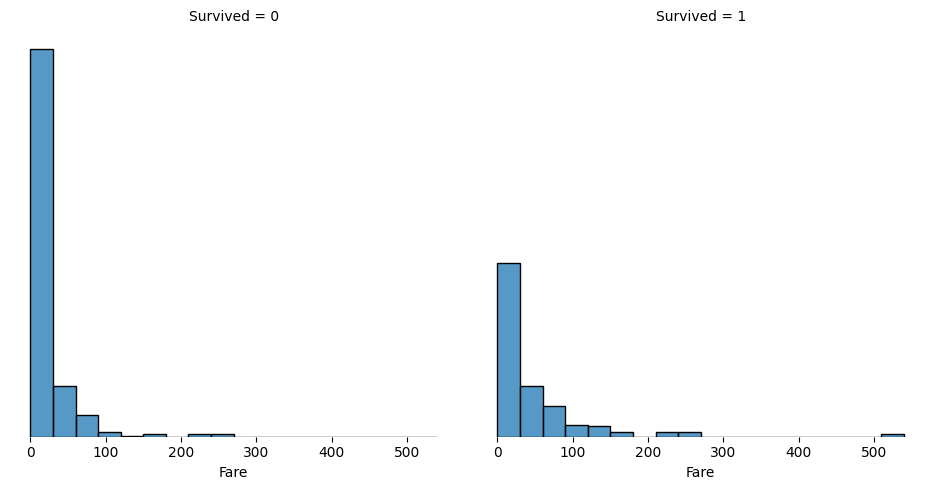

In [22]:
# Fare x Survived
g = sns.displot(train_df, x='Fare', col='Survived', binwidth=30, height=5)
for ax in g.axes.flat:
    ax.set_ylabel('')  
    ax.set_yticks([]) 
    sns.despine(ax=ax, bottom=True, left=True)


In [23]:
# Create discrete bins of Fare
train_df['fare_cut']=pd.qcut(train_df['Fare'], 6)
test_df['fare_cut']=pd.qcut(test_df['Fare'], 6)

In [24]:
train_df.groupby(['fare_cut'], as_index=False, observed=True)['Survived'].mean()

,fare_cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [25]:
#Reshaping the Fare variable as the min is -0.001 and the max is 512 (there 
# is a lot of data, so restructuring the variable based on the bins
# might ease the modelling)

train_df.loc[train_df['Fare']<=7.775, 'Fare']=0
train_df.loc[(train_df['Fare']>7.775) & (train_df['Fare']<= 8.662), 'Fare']=1
train_df.loc[(train_df['Fare']>8.662) & (train_df['Fare']<= 14.454), 'Fare']=2
train_df.loc[(train_df['Fare']>14.454) & (train_df['Fare']<= 26.0), 'Fare']=3
train_df.loc[(train_df['Fare']>26.0) & (train_df['Fare']<= 52.369), 'Fare']=4
train_df.loc[(train_df['Fare']>52.369) & (train_df['Fare']<= 512.329), 'Fare']=5
train_df.loc[train_df['Fare']>512.329, 'Fare']

test_df.loc[test_df['Fare']<=7.775, 'Fare']=0
test_df.loc[(test_df['Fare']>7.775) & (test_df['Fare']<= 8.662), 'Fare']=1
test_df.loc[(test_df['Fare']>8.662) & (test_df['Fare']<= 14.454), 'Fare']=2
test_df.loc[(test_df['Fare']>14.454) & (test_df['Fare']<= 26.0), 'Fare']=3
test_df.loc[(test_df['Fare']>26.0) & (test_df['Fare']<= 52.369), 'Fare']=4
test_df.loc[(test_df['Fare']>52.369) & (test_df['Fare']<= 512.329), 'Fare']=5
test_df.loc[test_df['Fare']>512.329, 'Fare']


343    512.3292
Name: Fare, dtype: float64

In [26]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_size_grouped,age_cut,fare_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


In [27]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [28]:
# Getting the title for each person from the name (string split)
train_df['title']=train_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x: x.strip())
test_df['title']=test_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x: x.strip())

In [29]:
# Title x Survived
train_df.groupby(['title'], as_index=False)['Survived'].mean()

,title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [30]:
# Military: Capt, Col, Major
# Noble: Jonkheer, the Countess, Don, Lady, Sir
# Unmaried Women: Mlle, Ms, Mmd

In [31]:
train_df['title']=train_df['title'].replace(
{'Capt':'Military',
'Col':'Military',
'Major':'Military',
'Jonkheer':'Noble',
'the Countess': 'Noble', 
'Don':'Noble', 
'Lady':'Noble',
'Sir':'Noble',
'Mlle':'Noble',
'Ms':'Noble', 
'Mme': 'Noble'}
)

test_df['title']=test_df['title'].replace(
{'Capt':'Military',
'Col':'Military',
'Major':'Military',
'Jonkheer':'Noble',
'the Countess': 'Noble', 
'Don':'Noble', 
'Lady':'Noble',
'Sir':'Noble',
'Mlle':'Noble',
'Ms':'Noble', 
'Mme': 'Noble'}
)

In [32]:
train_df.groupby(['title'], as_index=False)['Survived'].agg(['count', 'mean'])

,title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [33]:
train_df['name_len'] = train_df['Name'].apply(lambda x: len(x))
test_df['name_len'] = test_df['Name'].apply(lambda x: len(x))


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


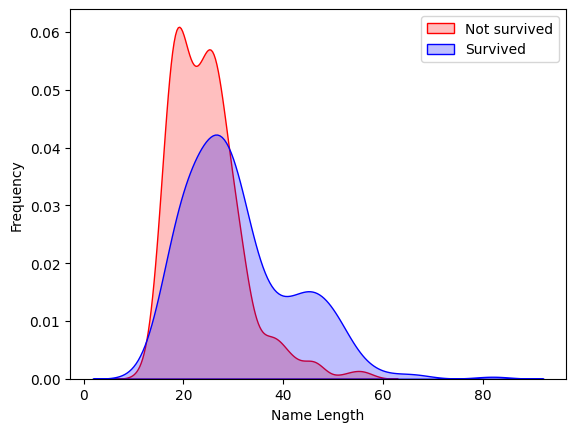

In [34]:
# Name Length x Survived

g= sns.kdeplot(train_df['name_len'][(train_df['Survived']==0) & (train_df['name_len'].notnull())], color='Red', fill=True)
g= sns.kdeplot(train_df['name_len'][(train_df['Survived']==1) & (train_df['name_len'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Name Length')
g.set_ylabel('Frequency')
g=g.legend(['Not survived', 'Survived'])

In [35]:
# Create discrete bins of the name_len variable 
train_df['name_lenGB']=pd.qcut(train_df['name_len'], 8)
test_df['name_lenGB']=pd.qcut(test_df['name_len'], 8)

In [36]:
train_df.groupby(['name_lenGB'], as_index=False, observed=True)['Survived'].mean()

,name_lenGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [37]:
#Reshaping the name_len variable as the min is 11.999 and the max is 82 (there 
# is a lot of data, so restructuring the variable based on the bins
# might ease the modelling)

train_df.loc[train_df['name_len']<=18.0, 'name_size']=0
train_df.loc[(train_df['name_len']>18.0) & (train_df['name_len']<= 20.0), 'name_size']=1
train_df.loc[(train_df['name_len']>20.0) & (train_df['name_len']<= 23.0), 'name_size']=2
train_df.loc[(train_df['name_len']>23.0) & (train_df['name_len']<= 25.0), 'name_size']=3
train_df.loc[(train_df['name_len']>25.0) & (train_df['name_len']<= 27.25), 'name_size']=4
train_df.loc[(train_df['name_len']>27.25) & (train_df['name_len']<= 30.0), 'name_size']=5
train_df.loc[(train_df['name_len']>30.0) & (train_df['name_len']<= 82.0), 'name_size']=6
train_df.loc[(train_df['name_len']>38.0) & (train_df['name_len']<= 30.0), 'name_size']=7
train_df.loc[train_df['name_len']>82.0, 'name_size']

test_df.loc[test_df['name_len']<=18.0, 'name_size']=0
test_df.loc[(test_df['name_len']>18.0) & (test_df['name_len']<= 20.0), 'name_size']=1
test_df.loc[(test_df['name_len']>20.0) & (test_df['name_len']<= 23.0), 'name_size']=2
test_df.loc[(test_df['name_len']>23.0) & (test_df['name_len']<= 25.0), 'name_size']=3
test_df.loc[(test_df['name_len']>25.0) & (test_df['name_len']<= 27.25), 'name_size']=4
test_df.loc[(test_df['name_len']>27.25) & (test_df['name_len']<= 30.0), 'name_size']=5
test_df.loc[(test_df['name_len']>30.0) & (test_df['name_len']<= 82.0), 'name_size']=6
test_df.loc[(test_df['name_len']>38.0) & (test_df['name_len']<= 30.0), 'name_size']=7
test_df.loc[test_df['name_len']>82.0, 'name_size']


Series([], Name: name_size, dtype: float64)

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_size_grouped,age_cut,fare_cut,title,name_len,name_lenGB,name_size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",6.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",6.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [39]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [40]:
train_df['ticket_number']=train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['ticket_number']=test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [41]:
# Ticket Number x Survival
train_df.groupby(['ticket_number'], as_index=False, observed=True)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,ticket_number,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [42]:
# how common a ticket is? 
train_df.groupby('ticket_number')['ticket_number'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: ticket_number, Length: 891, dtype: int64

In [43]:
train_df['ticket_number_counts'] = train_df.groupby('ticket_number')['ticket_number'].transform('count')
test_df['ticket_number_counts'] = test_df.groupby('ticket_number')['ticket_number'].transform('count')

In [44]:
# Ticket_number_counts x Survived
train_df.groupby(['ticket_number_counts'], as_index=False, observed=True)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,ticket_number_counts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [45]:
train_df['Ticket'].str.split(pat=' ', expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [46]:
train_df['ticket_location'] = np.where(train_df['Ticket'].str.split(pat=' ', expand=True)[1].notna(), train_df['Ticket'].str.split(pat=' ', expand=True)[0].apply(lambda x: x.strip()), 'blank')
test_df['ticket_location'] = np.where(test_df['Ticket'].str.split(pat=' ', expand=True)[1].notna(), test_df['Ticket'].str.split(pat=' ', expand=True)[0].apply(lambda x: x.strip()), 'blank')

In [47]:
train_df['ticket_location'].value_counts()

ticket_location
blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [48]:
# Clean-up the ticket_location variable
train_df['ticket_location'] = train_df['ticket_location'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C/':'W/C'
})

test_df['ticket_location'] = test_df['ticket_location'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C/':'W/C'
})

In [49]:
train_df['ticket_location'].value_counts()

ticket_location
blank         665
PC             60
CA             41
A/5            21
SOTON/OQ       15
STON/O         12
SC/Paris       11
W./C.           9
STON/O2.        6
A/4             6
F.C.C.          5
C               5
S.O.C.          5
S.O./P.P.       3
PP              3
SC/AH           3
P/PP            2
SOTON/O2        2
WE/P            2
SO/C            1
F.C.            1
S.W./PP         1
A/S             1
SC              1
SCO/W           1
SW/PP           1
W/C             1
Fa              1
S.O.P.          1
S.C./A.4.       1
A4.             1
S.P.            1
W.E.P.          1
C.A./SOTON      1
Name: count, dtype: int64

In [50]:
# Ticket_location x Survival
train_df.groupby(['ticket_location'], as_index=False, observed=True)['Survived'].agg(['count', 'mean'])

,ticket_location,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,C,5,0.400000
5,C.A./SOTON,1,0.000000
6,CA,41,0.341463
7,F.C.,1,0.000000
8,F.C.C.,5,0.800000
9,Fa,1,0.000000


In [51]:
train_df['Cabin']=train_df['Cabin'].fillna('U')
train_df['Cabin']=pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin']=test_df['Cabin'].fillna('U')
test_df['Cabin']=pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [52]:
# Cabin x Survival

train_df.groupby(['Cabin'], as_index=False, observed=True)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [53]:
# reshaping the cabin variable into a binary one
train_df['Cabin_assigned']=train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_assigned']=test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [54]:
train_df.groupby(['Cabin_assigned'], as_index=False, observed=True)['Survived'].agg(['count', 'mean'])

,Cabin_assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [55]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,age_cut,fare_cut,title,name_len,name_lenGB,name_size,ticket_number,ticket_number_counts,ticket_location,Cabin_assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",6.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",6.0,113803,2,blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,blank,0


In [56]:
train_df.shape

(891, 24)

In [57]:
test_df.shape

(418, 23)

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           891 non-null    int64   
 1   Survived              891 non-null    int64   
 2   Pclass                891 non-null    int64   
 3   Name                  891 non-null    object  
 4   Sex                   891 non-null    object  
 5   Age                   714 non-null    float64 
 6   SibSp                 891 non-null    int64   
 7   Parch                 891 non-null    int64   
 8   Ticket                891 non-null    object  
 9   Fare                  891 non-null    float64 
 10  Cabin                 891 non-null    object  
 11  Embarked              889 non-null    object  
 12  family_size           891 non-null    int64   
 13  family_size_grouped   891 non-null    object  
 14  age_cut               714 non-null    category
 15  fare_c

In [59]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_size',
       'family_size_grouped', 'age_cut', 'fare_cut', 'title', 'name_len',
       'name_lenGB', 'name_size', 'ticket_number', 'ticket_number_counts',
       'ticket_location', 'Cabin_assigned'],
      dtype='object')

In [60]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())


In [61]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [62]:
ode_cols = ['family_size_grouped']
ohe_cols = ['Sex', 'Embarked']


In [63]:
x = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
x_test = test_df.drop(['age_cut', 'fare_cut'], axis=1)


In [64]:
# Train-test split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y, random_state=21)